# KNN Model - Temperature Data - Climate Wins

### The following script contains: 
#### 01. Import Data and Libraries
#### 02. Prepare and Train Scaled Dataset
#### 03. Prepare and Train Regular Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Import Data
# Define a path for easier importation
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins'
# Importing both datasets to compare how scaled vs original data affects prediction
climate_scaled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Climate_Data_Scaled.csv'), index_col = 0)
climate_reg = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Climate_Data_Reg.csv'), index_col = 0)
# import pleasant weather data
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [3]:
# confirm imports
climate_scaled.head()

ID      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.761754   
1         -0.179228  ...              0.783085           1.183580   
2         -0.179228  ...              0.783085           1.183580   
3         -0.179228  ...              0.783085           0.480538   
4         -0.179228  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 171 columns]

In [4]:
# drop ID column
climate_scaled.drop('ID', axis =1, inplace=True)

In [5]:
# Confirm drop
climate_scaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.179228       -0.902918  ...             -0.443701   
1         -0.179228       -0.810126  ...              0.783085   
2         -0.179228       -1.065304  ...              0.783085   
3         -0.179228       -0.114186  ...              0.783085   
4         -0.179228        0.187388  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 170 columns]

In [6]:
climate_reg.head()

ID      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1                  7               2.1            0.85   
1   1  19600102      1                  6               2.1            0.84   
2   2  19600103      1                  8               2.1            0.90   
3   3  19600104      1                  3               2.1            0.92   
4   4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                 0  ...                     5               0.88   
1                 0  ...                     7               0.91   
2                 0  ...                     7               0.91   
3                 0  ...                     7               0.86   
4                 0  ...                     3               0.80   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0             1.0003                       0.45                    0.34   
1             1.0007                       0.25                    0.84   
2             1.0096                       0.17                    0.08   
3             1.0184                       0.13                    0.98   
4             1.0328                       0.46                    0.00   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0                4.7                 8.5   
1                    0                0.7                 8.9   
2                    0                0.1                10.5   
3                    0                0.0                 7.4   
4                    0                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max  
0                6.0               10.9  
1                5.6               12.1  
2                8.1               12.9  
3                7.3               10.6  
4                3.0                8.4  

[5 rows x 171 columns]

In [7]:
climate_reg.drop('ID', axis =1, inplace=True)
climate_reg.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [8]:
climate_scaled.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

### 02. Prepare and Train Scaled Dataset

In [9]:
# Reduce to just the temperature variables excluding (Gdansk, Roma, and Tours)
df_scaled = climate_scaled[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [10]:
# create an 'X' matrix by dropping unneeded columns
X = df_scaled.drop(['DATE', 'MONTH'], axis = 1)
y = pleasantweather.drop(['DATE'], axis = 1)

In [11]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# confirm data split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [14]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [16]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
k - [1 2 3]


C:\Users\kenzy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kenzy\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\kenzy\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

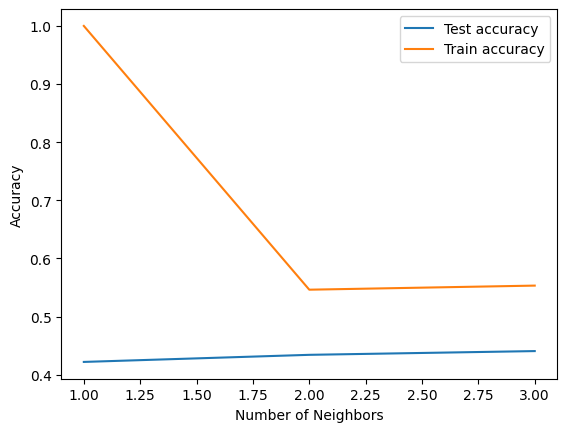

In [17]:
# plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [18]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


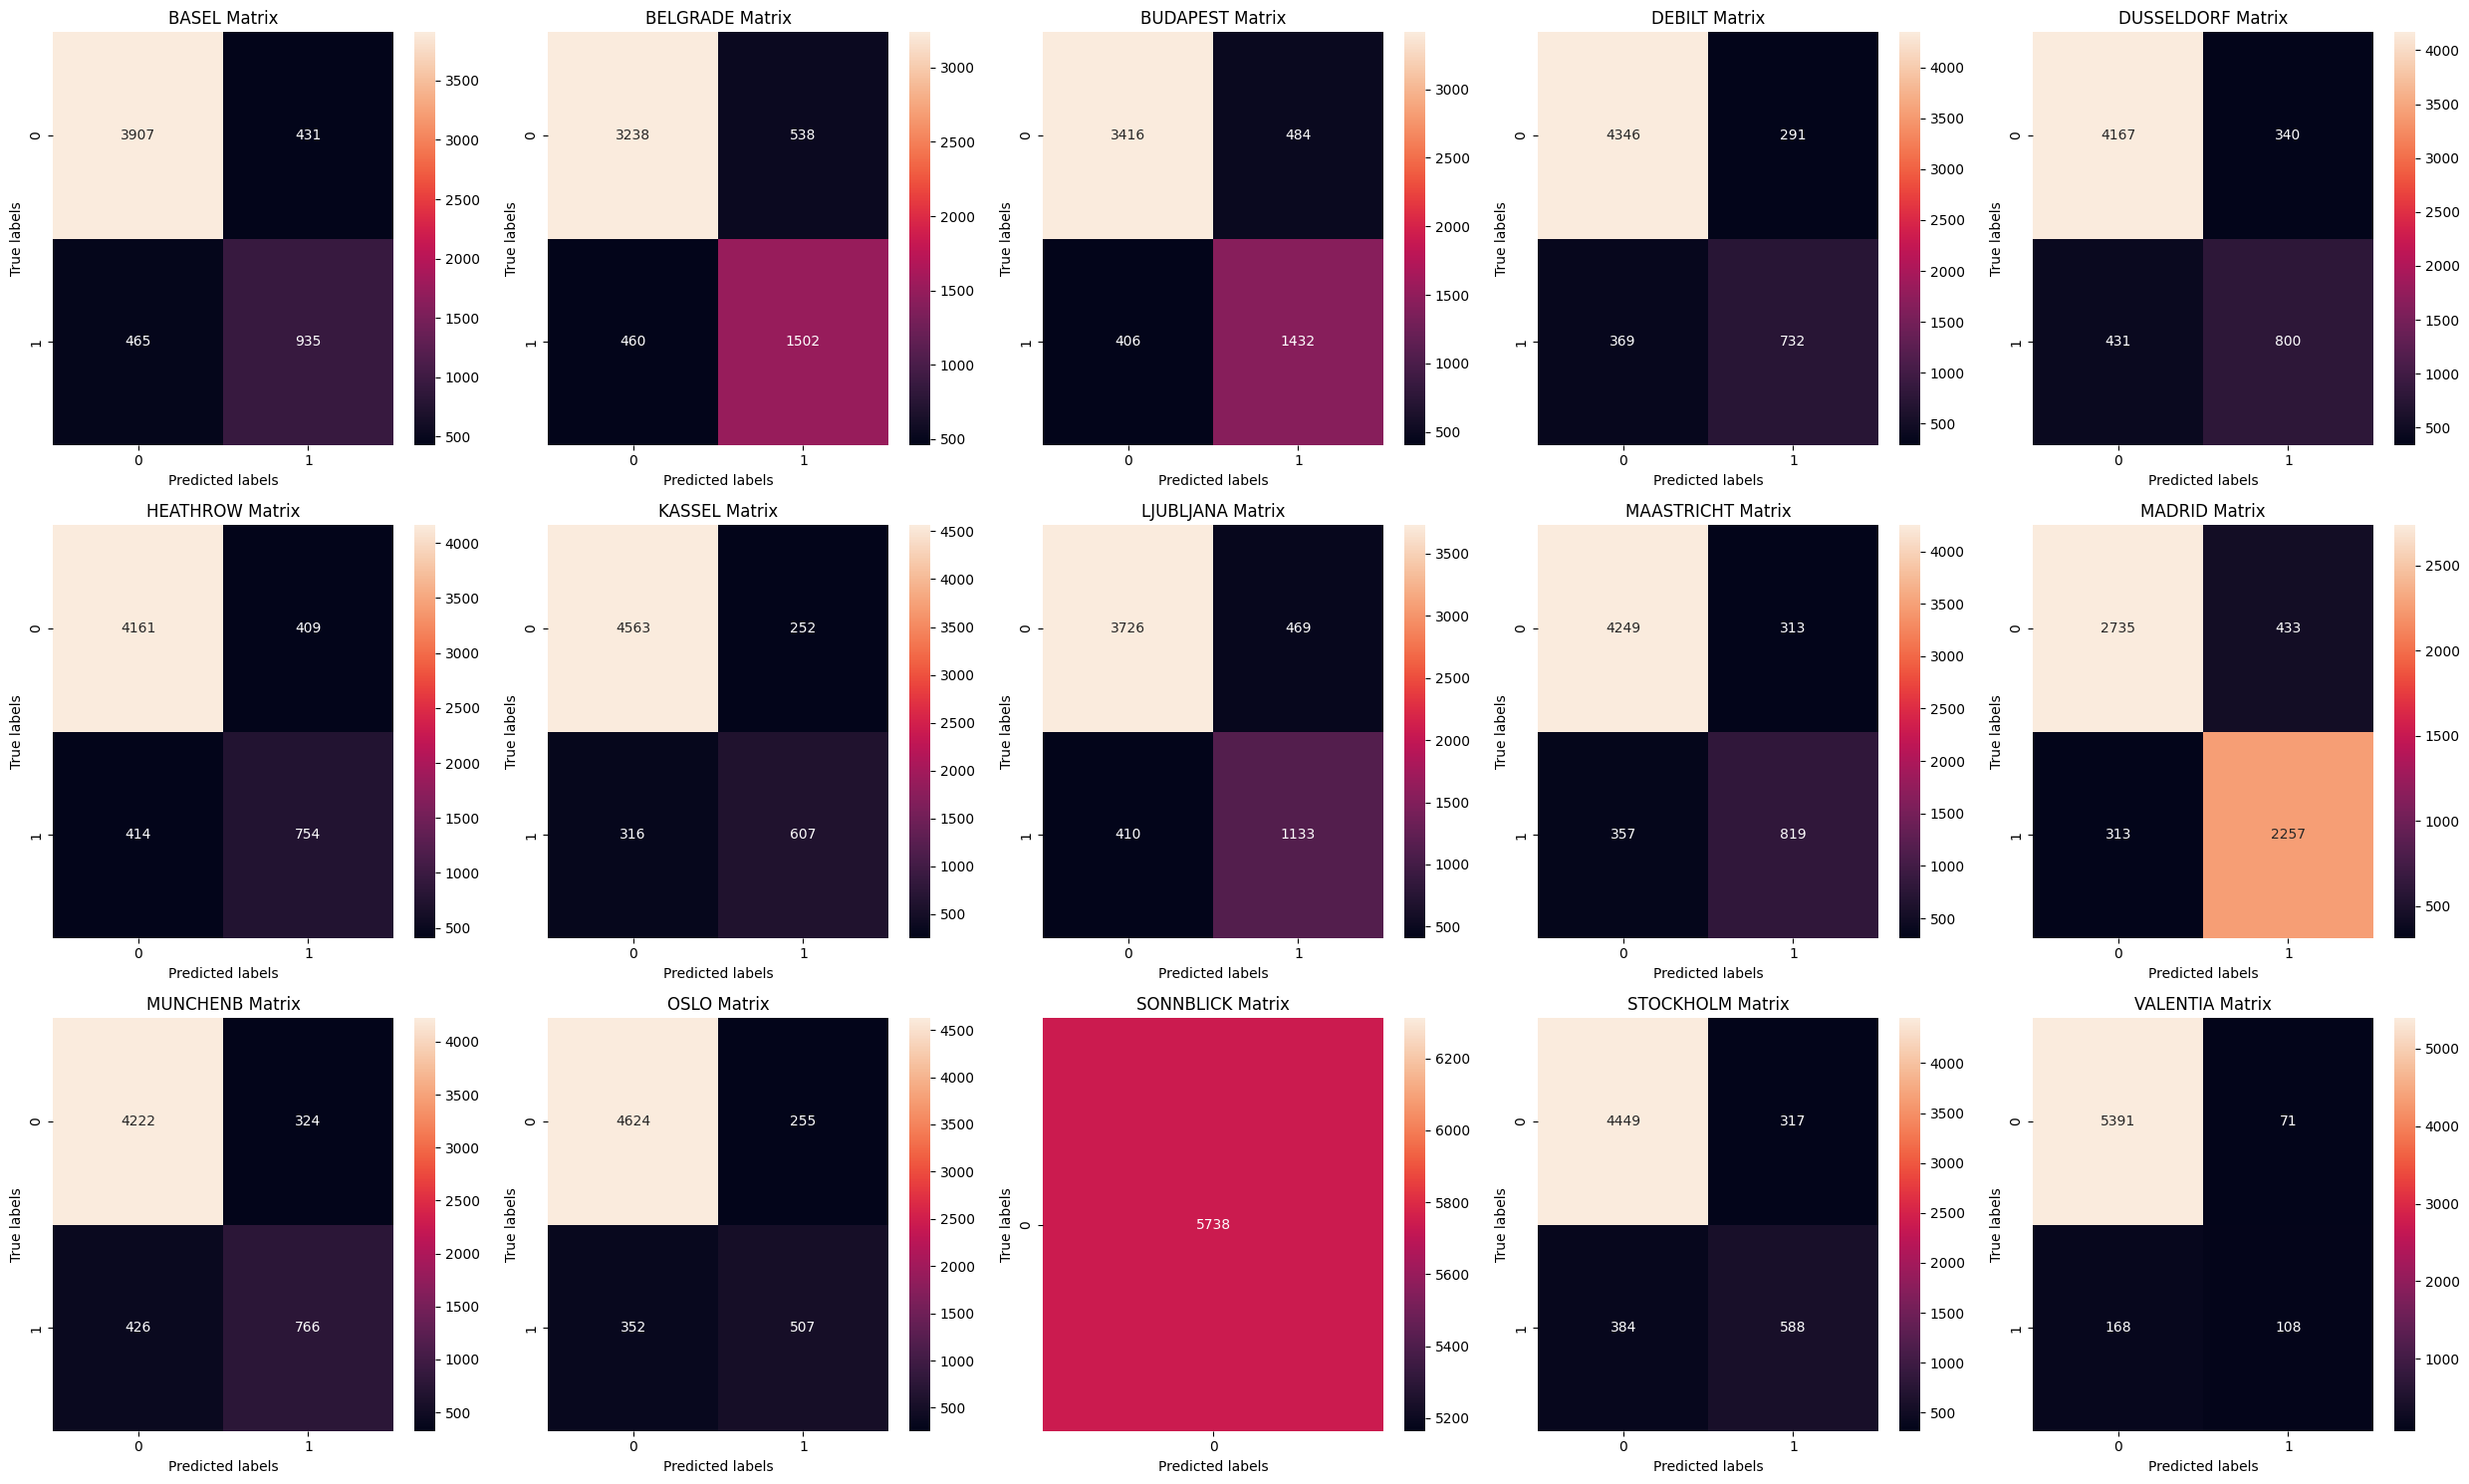

In [19]:
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels') 
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


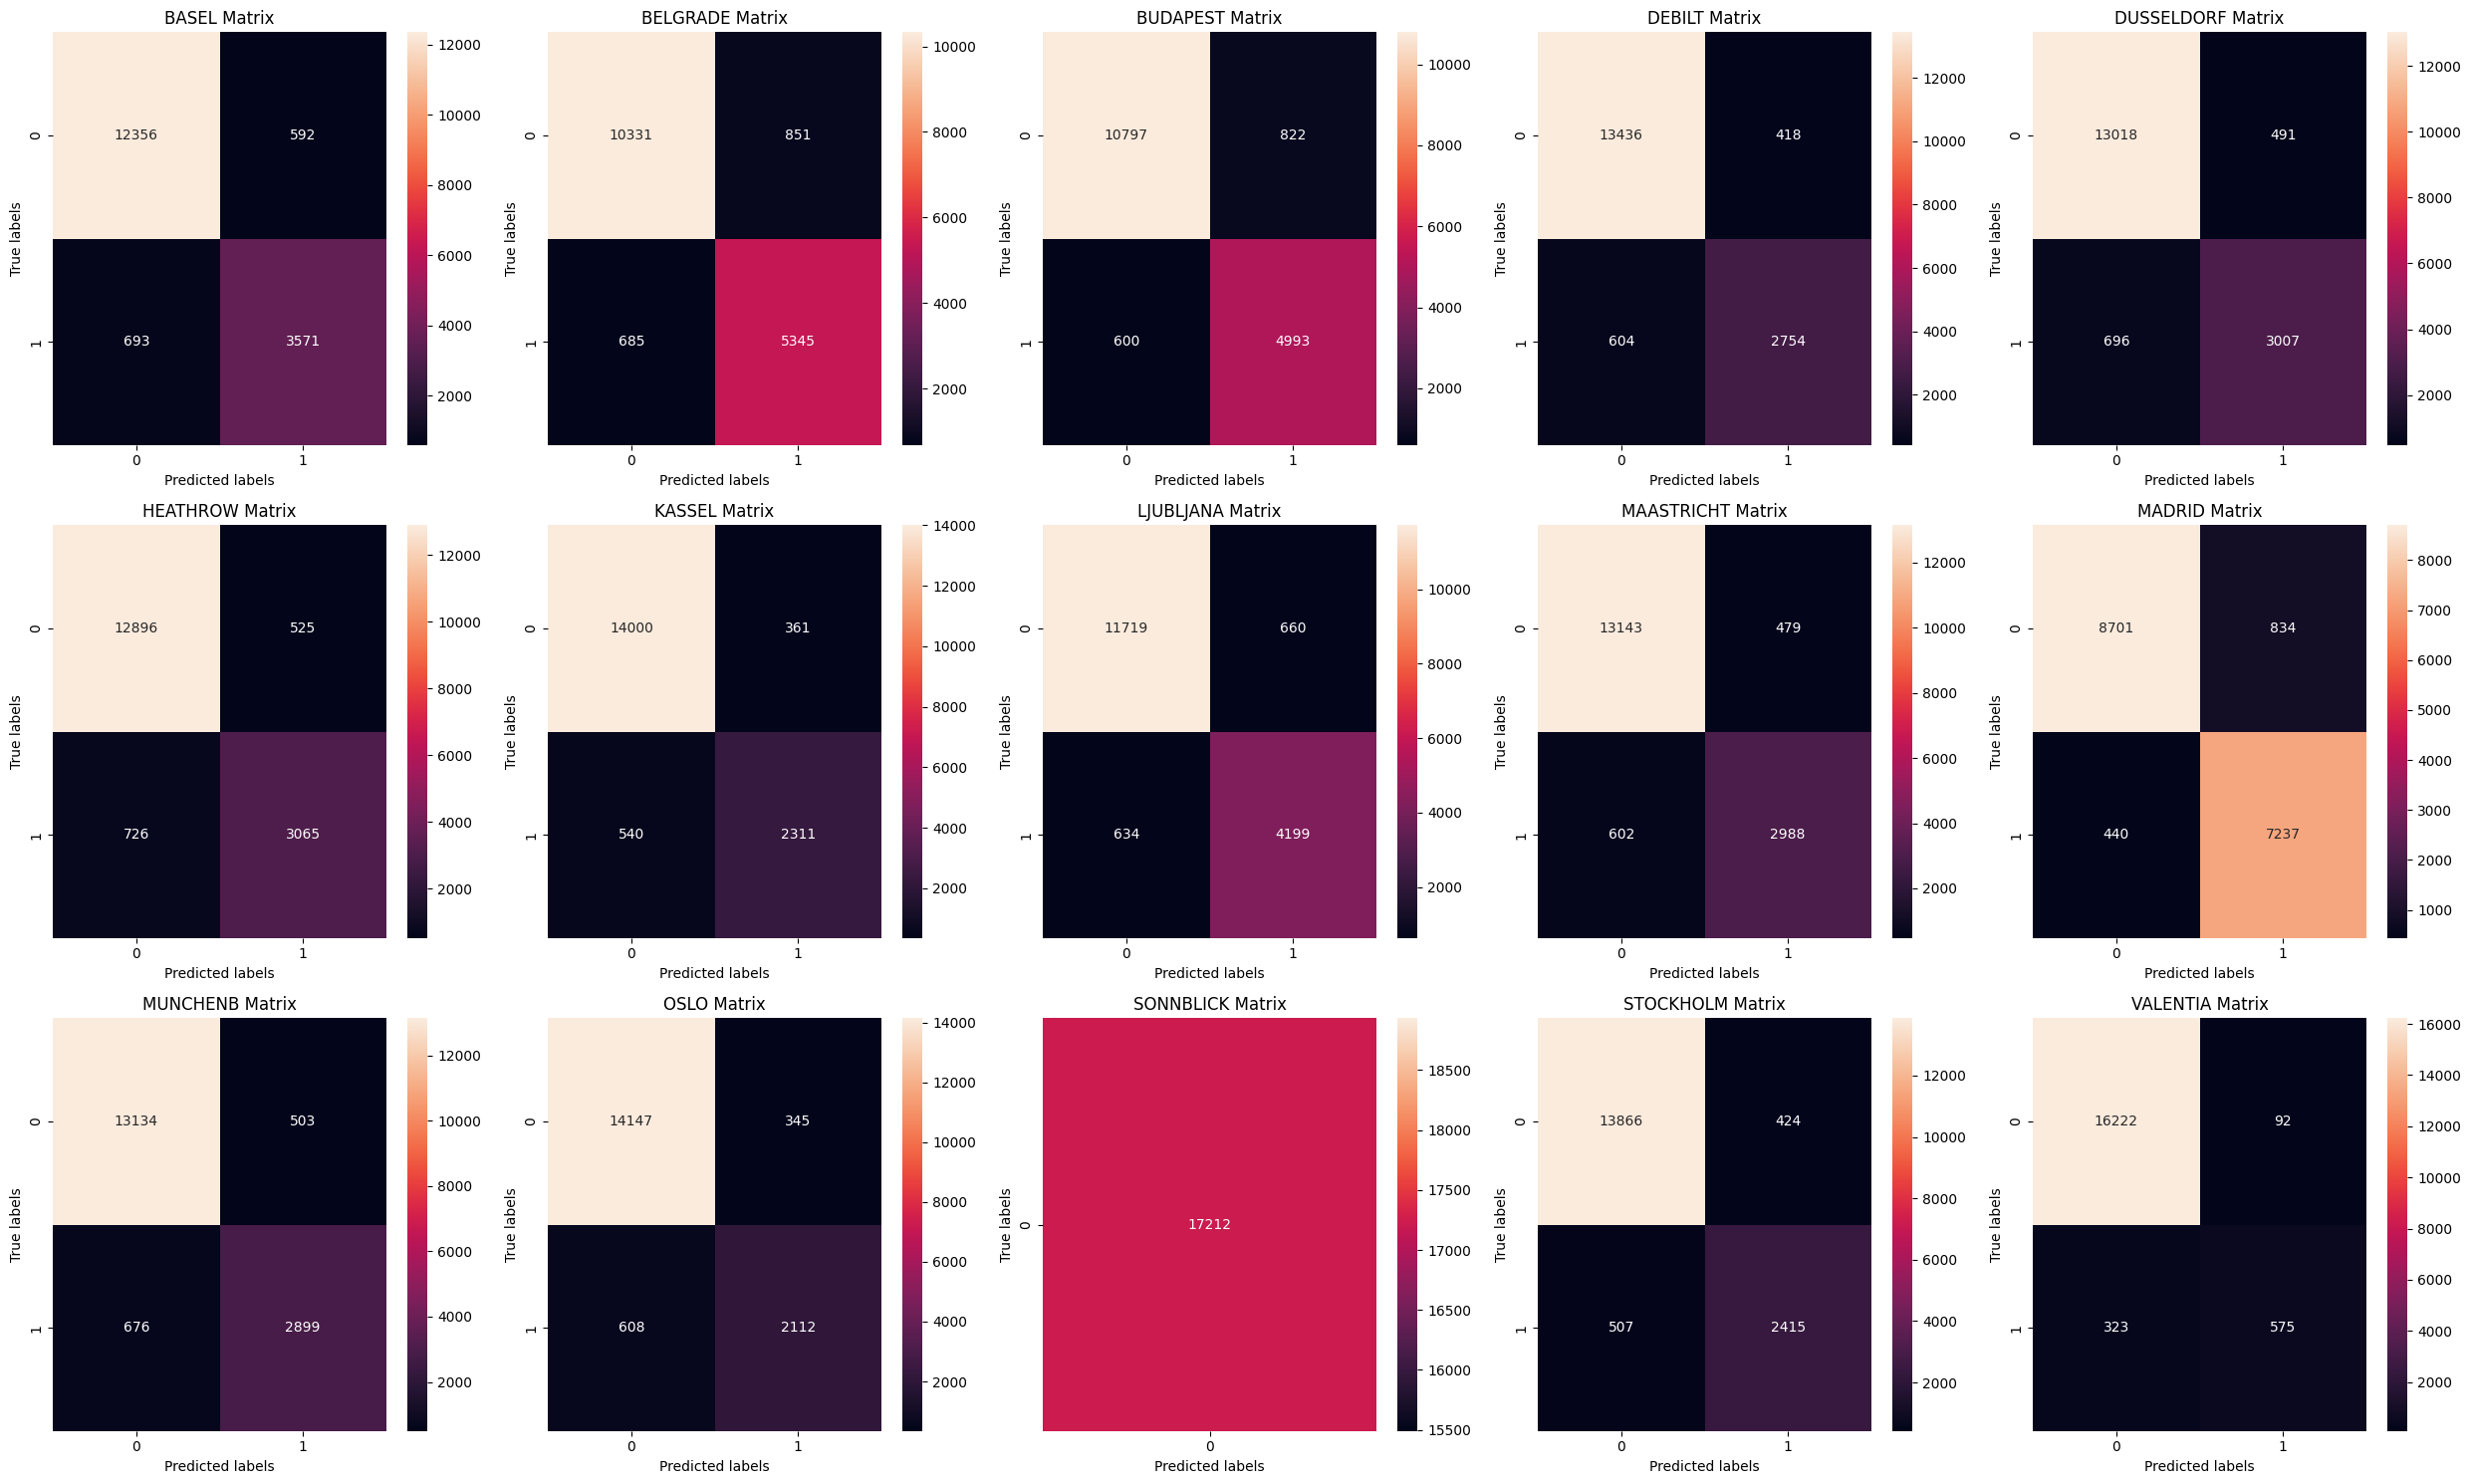

In [20]:
# Confusion matrix based on the last "k" in the sequence (Train data)
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train[:, count], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels') 
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

### 03. Prepare and Test Regular Data

In [21]:
# Reduce to just the temperature variables excluding (Gdansk, Roma, and Tours)
df_reg = climate_reg[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [22]:
# create an 'X' matrix by dropping unneeded columns
X = df_reg.drop(['DATE', 'MONTH'], axis = 1)
y = pleasantweather.drop(['DATE'], axis = 1)

In [23]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [24]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# confirm data split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [26]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

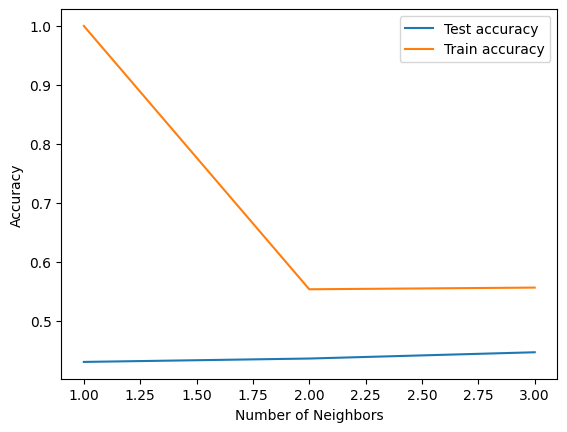

In [33]:
# plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [34]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df_reg.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


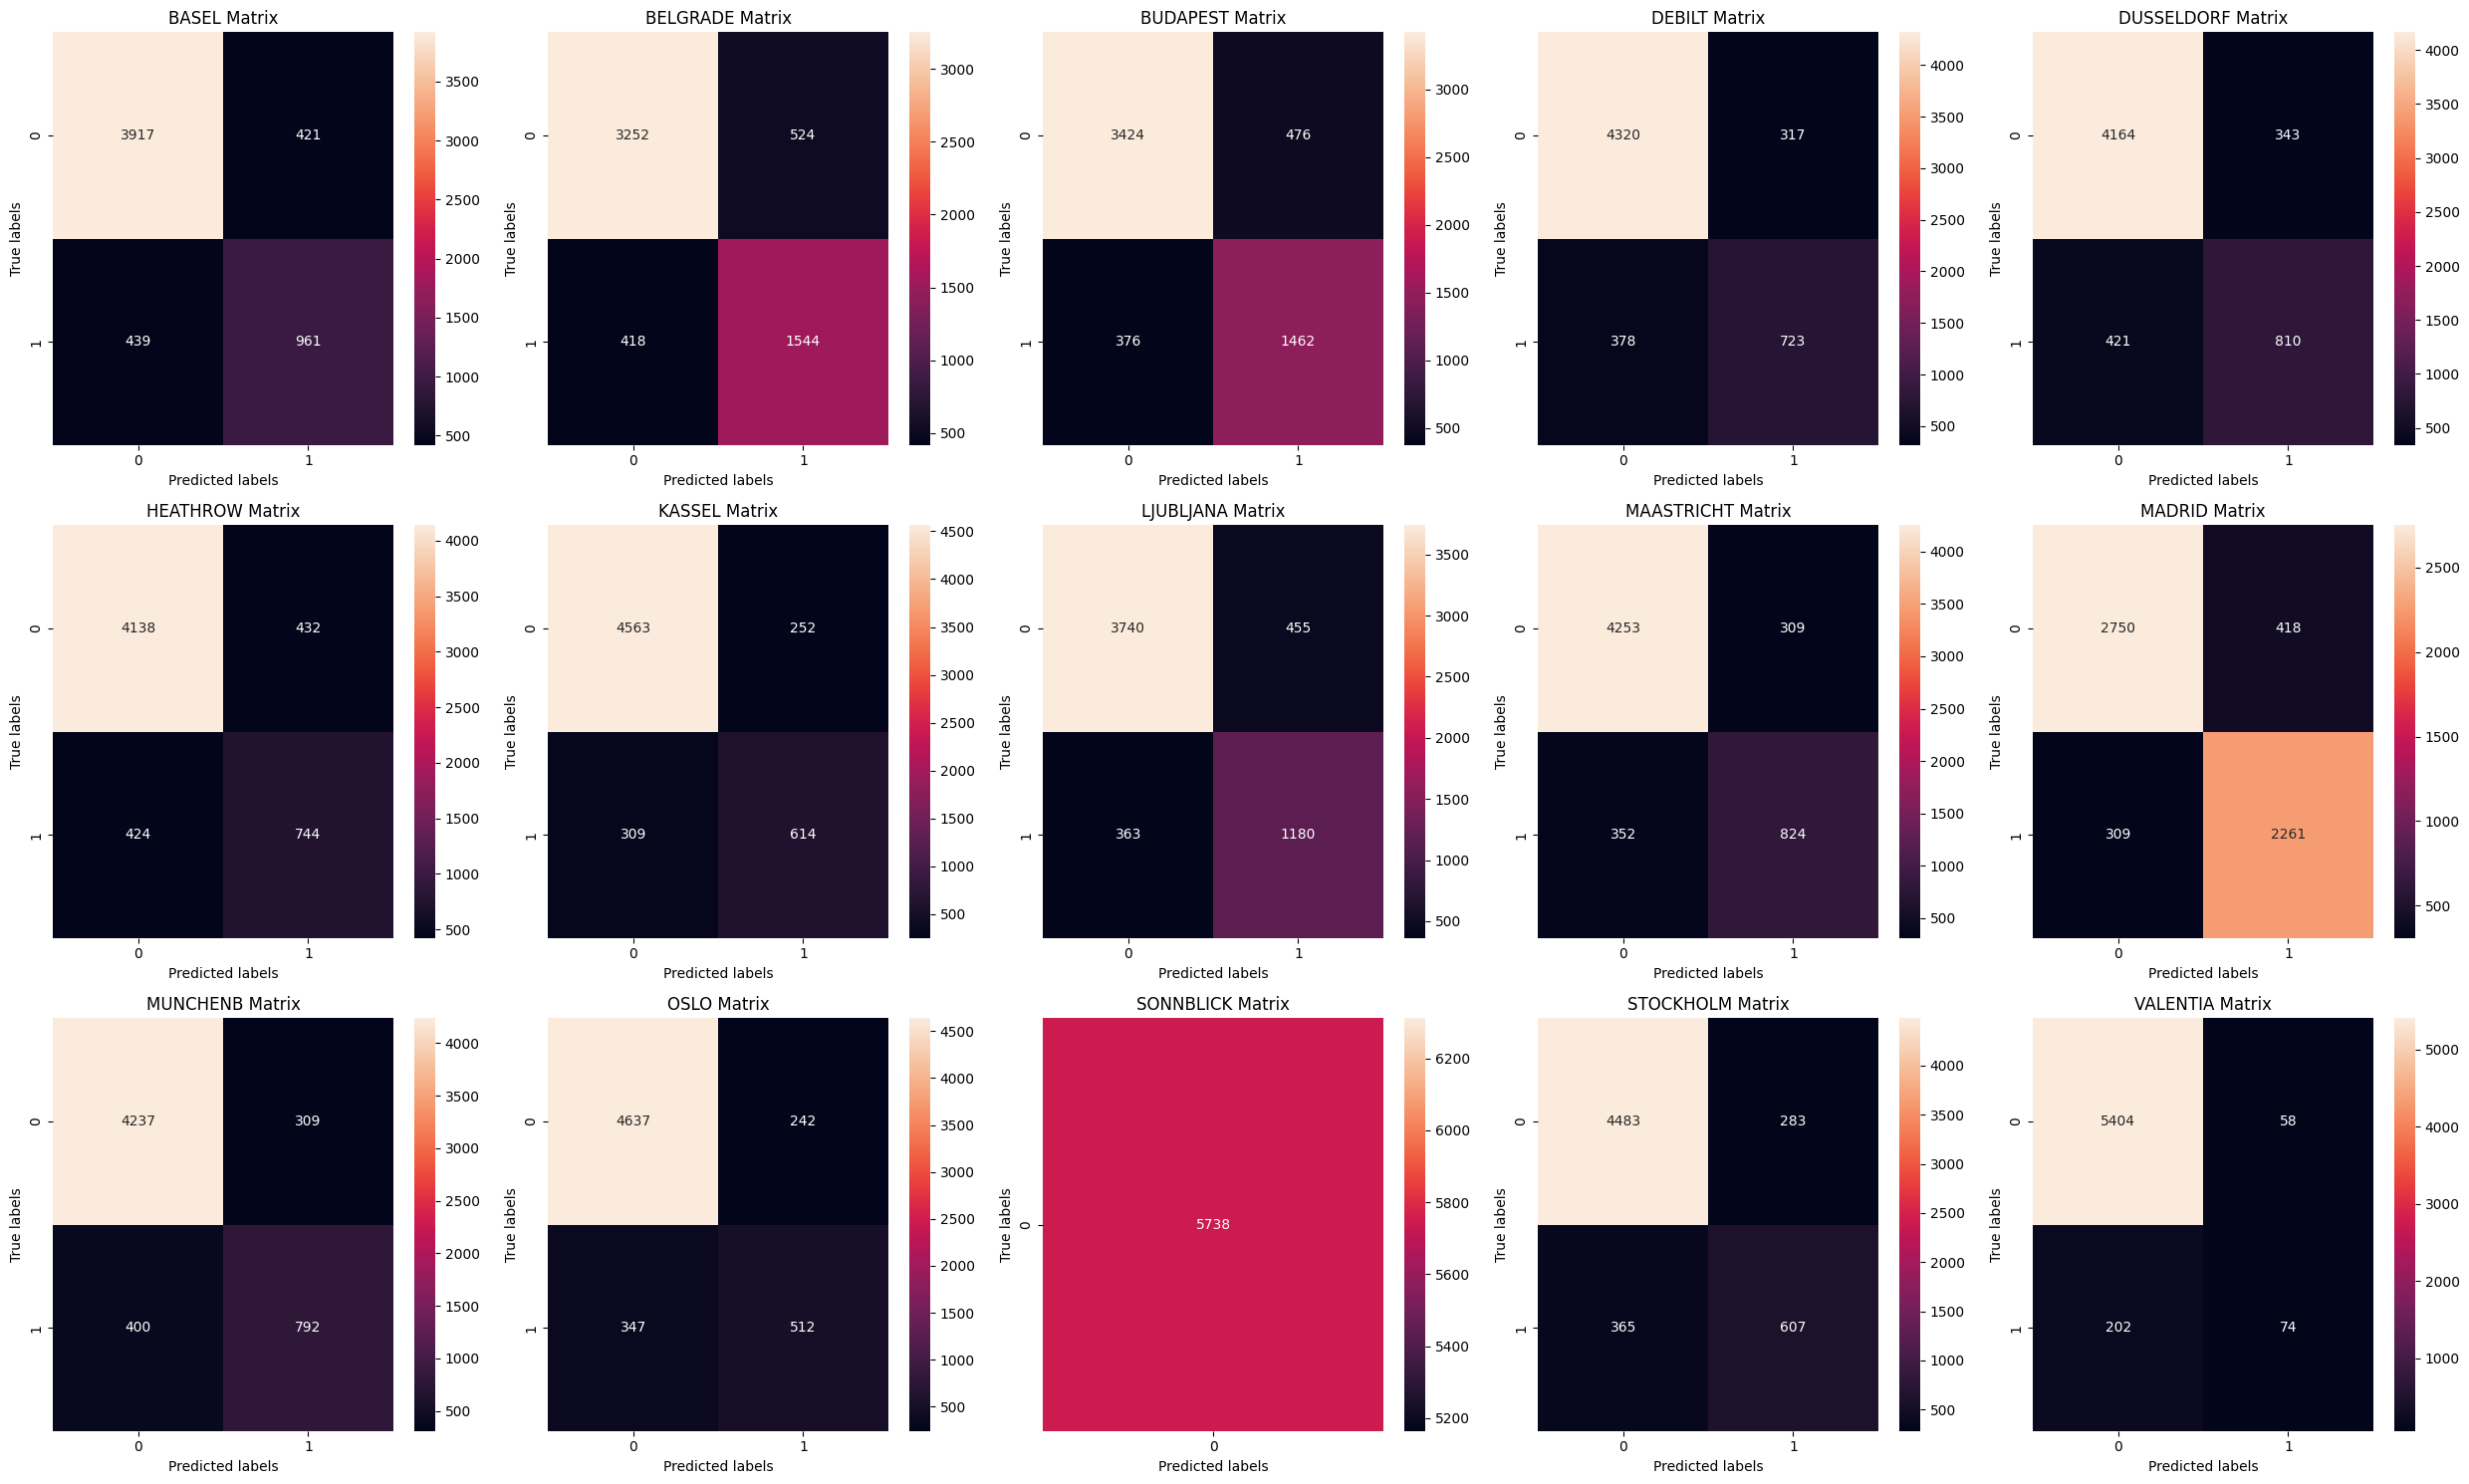

In [35]:
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels') 
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


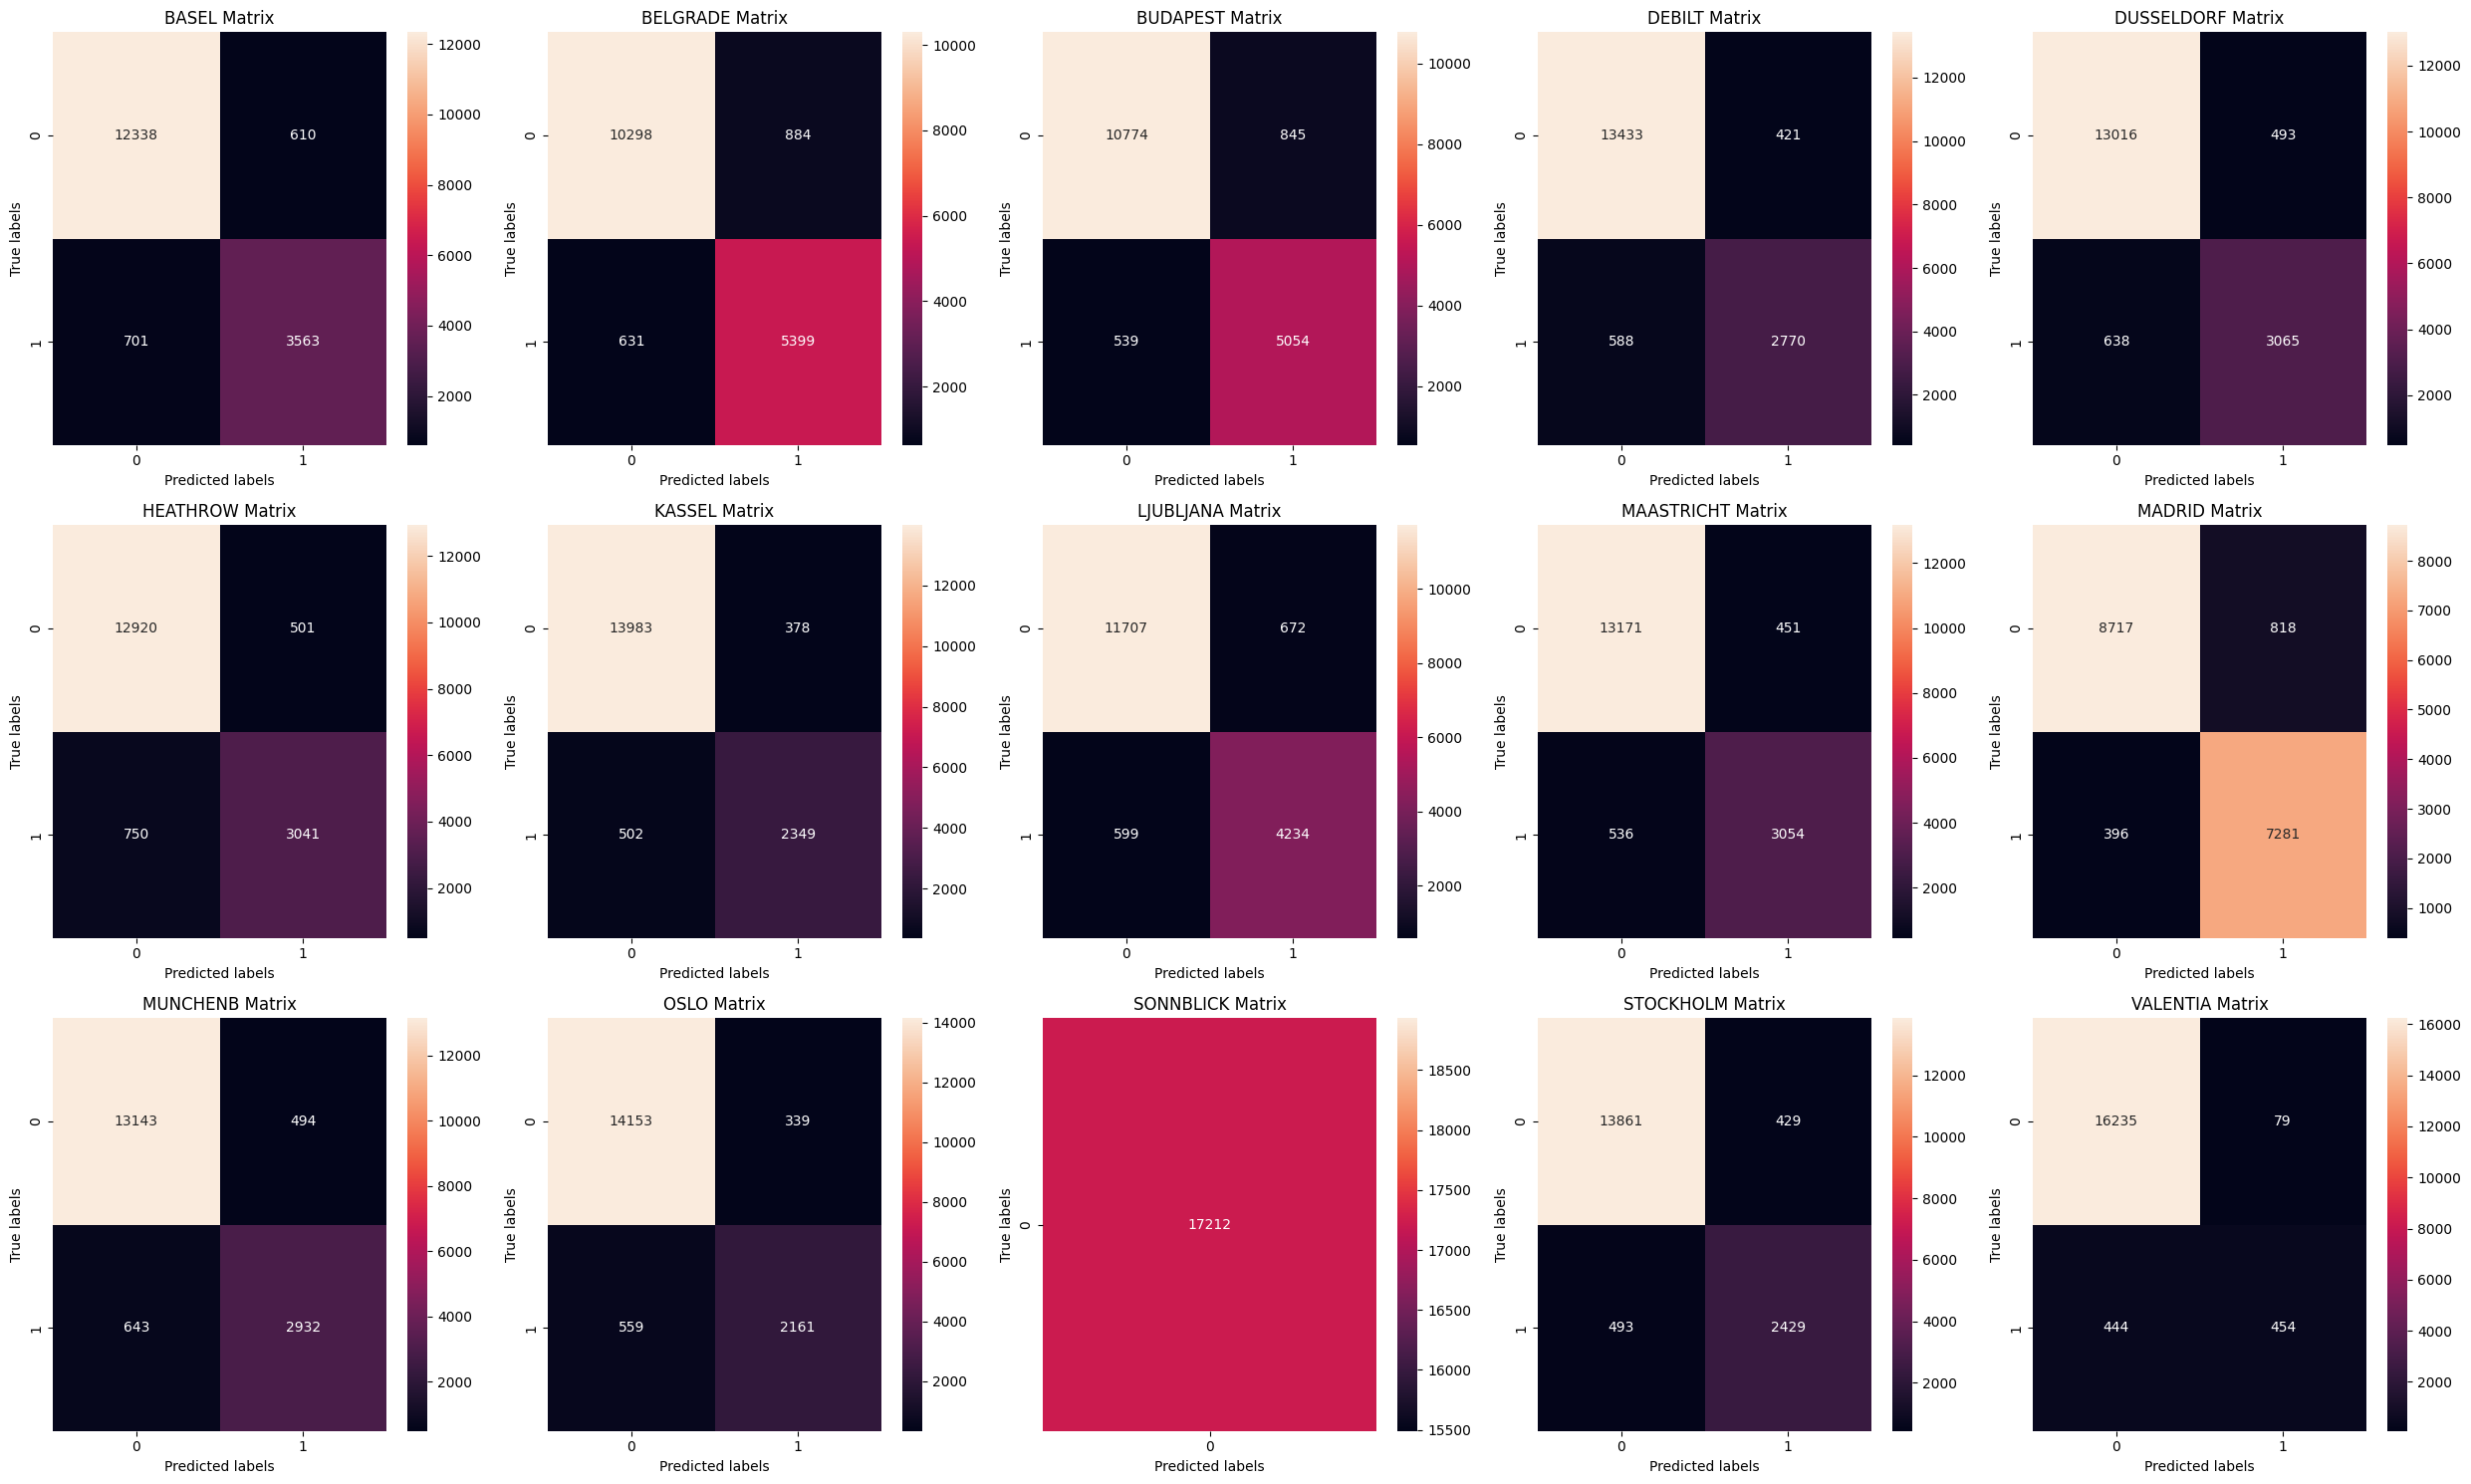

In [36]:
# Confusion matrix based on the last "k" in the sequence (Train data)
locations = list({x.split("_")[0] for x in df_reg.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train[:, count], y_pred_train[:, count])  # Change here
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])

        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

In [37]:
# Compare Accuracy with a higher number of neighbours ('k')
#Run the model with neighbors equal to 1 to 15, test the accuracy
k_range = np.arange(1,15)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 10
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 11
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 12
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
i - 13
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


<function matplotlib.pyplot.show(close=None, block=None)>

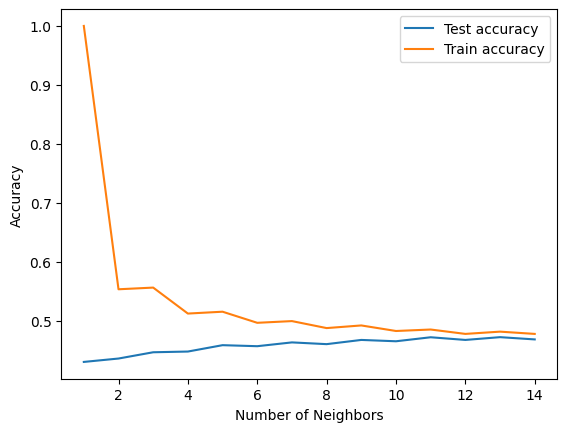

In [38]:
# plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


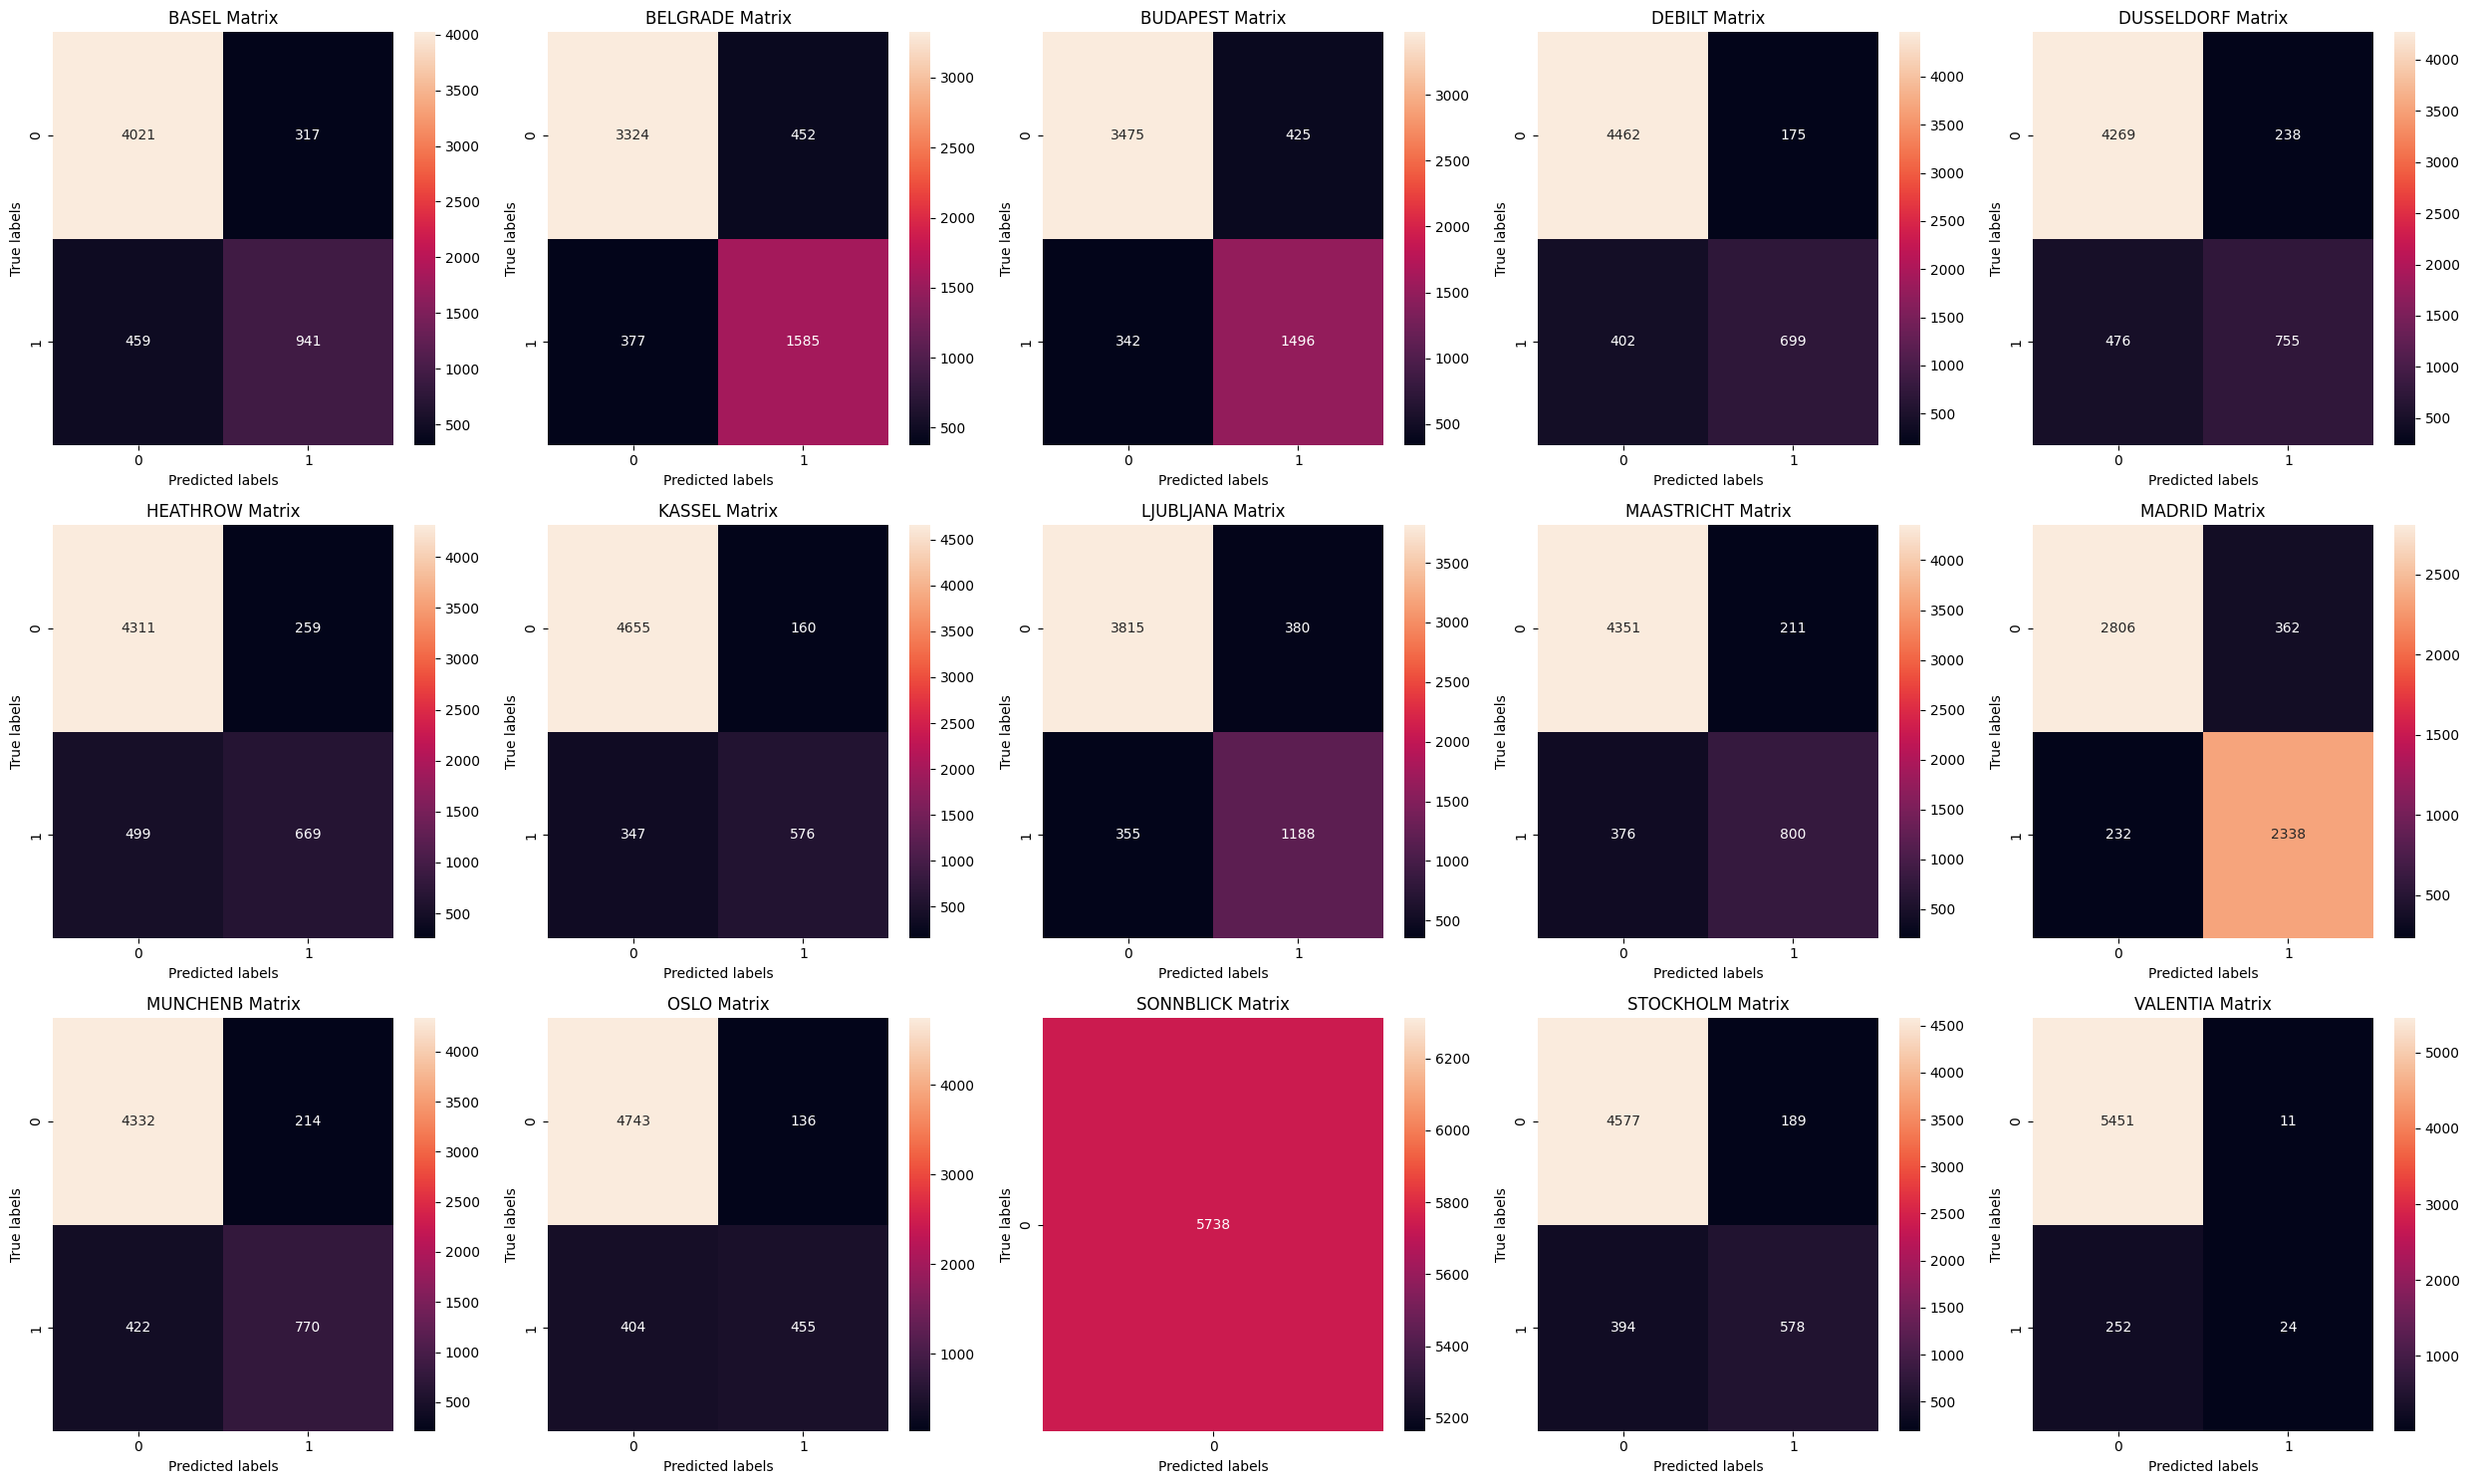

In [39]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df_reg.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels') 
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

C:\Users\kenzy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


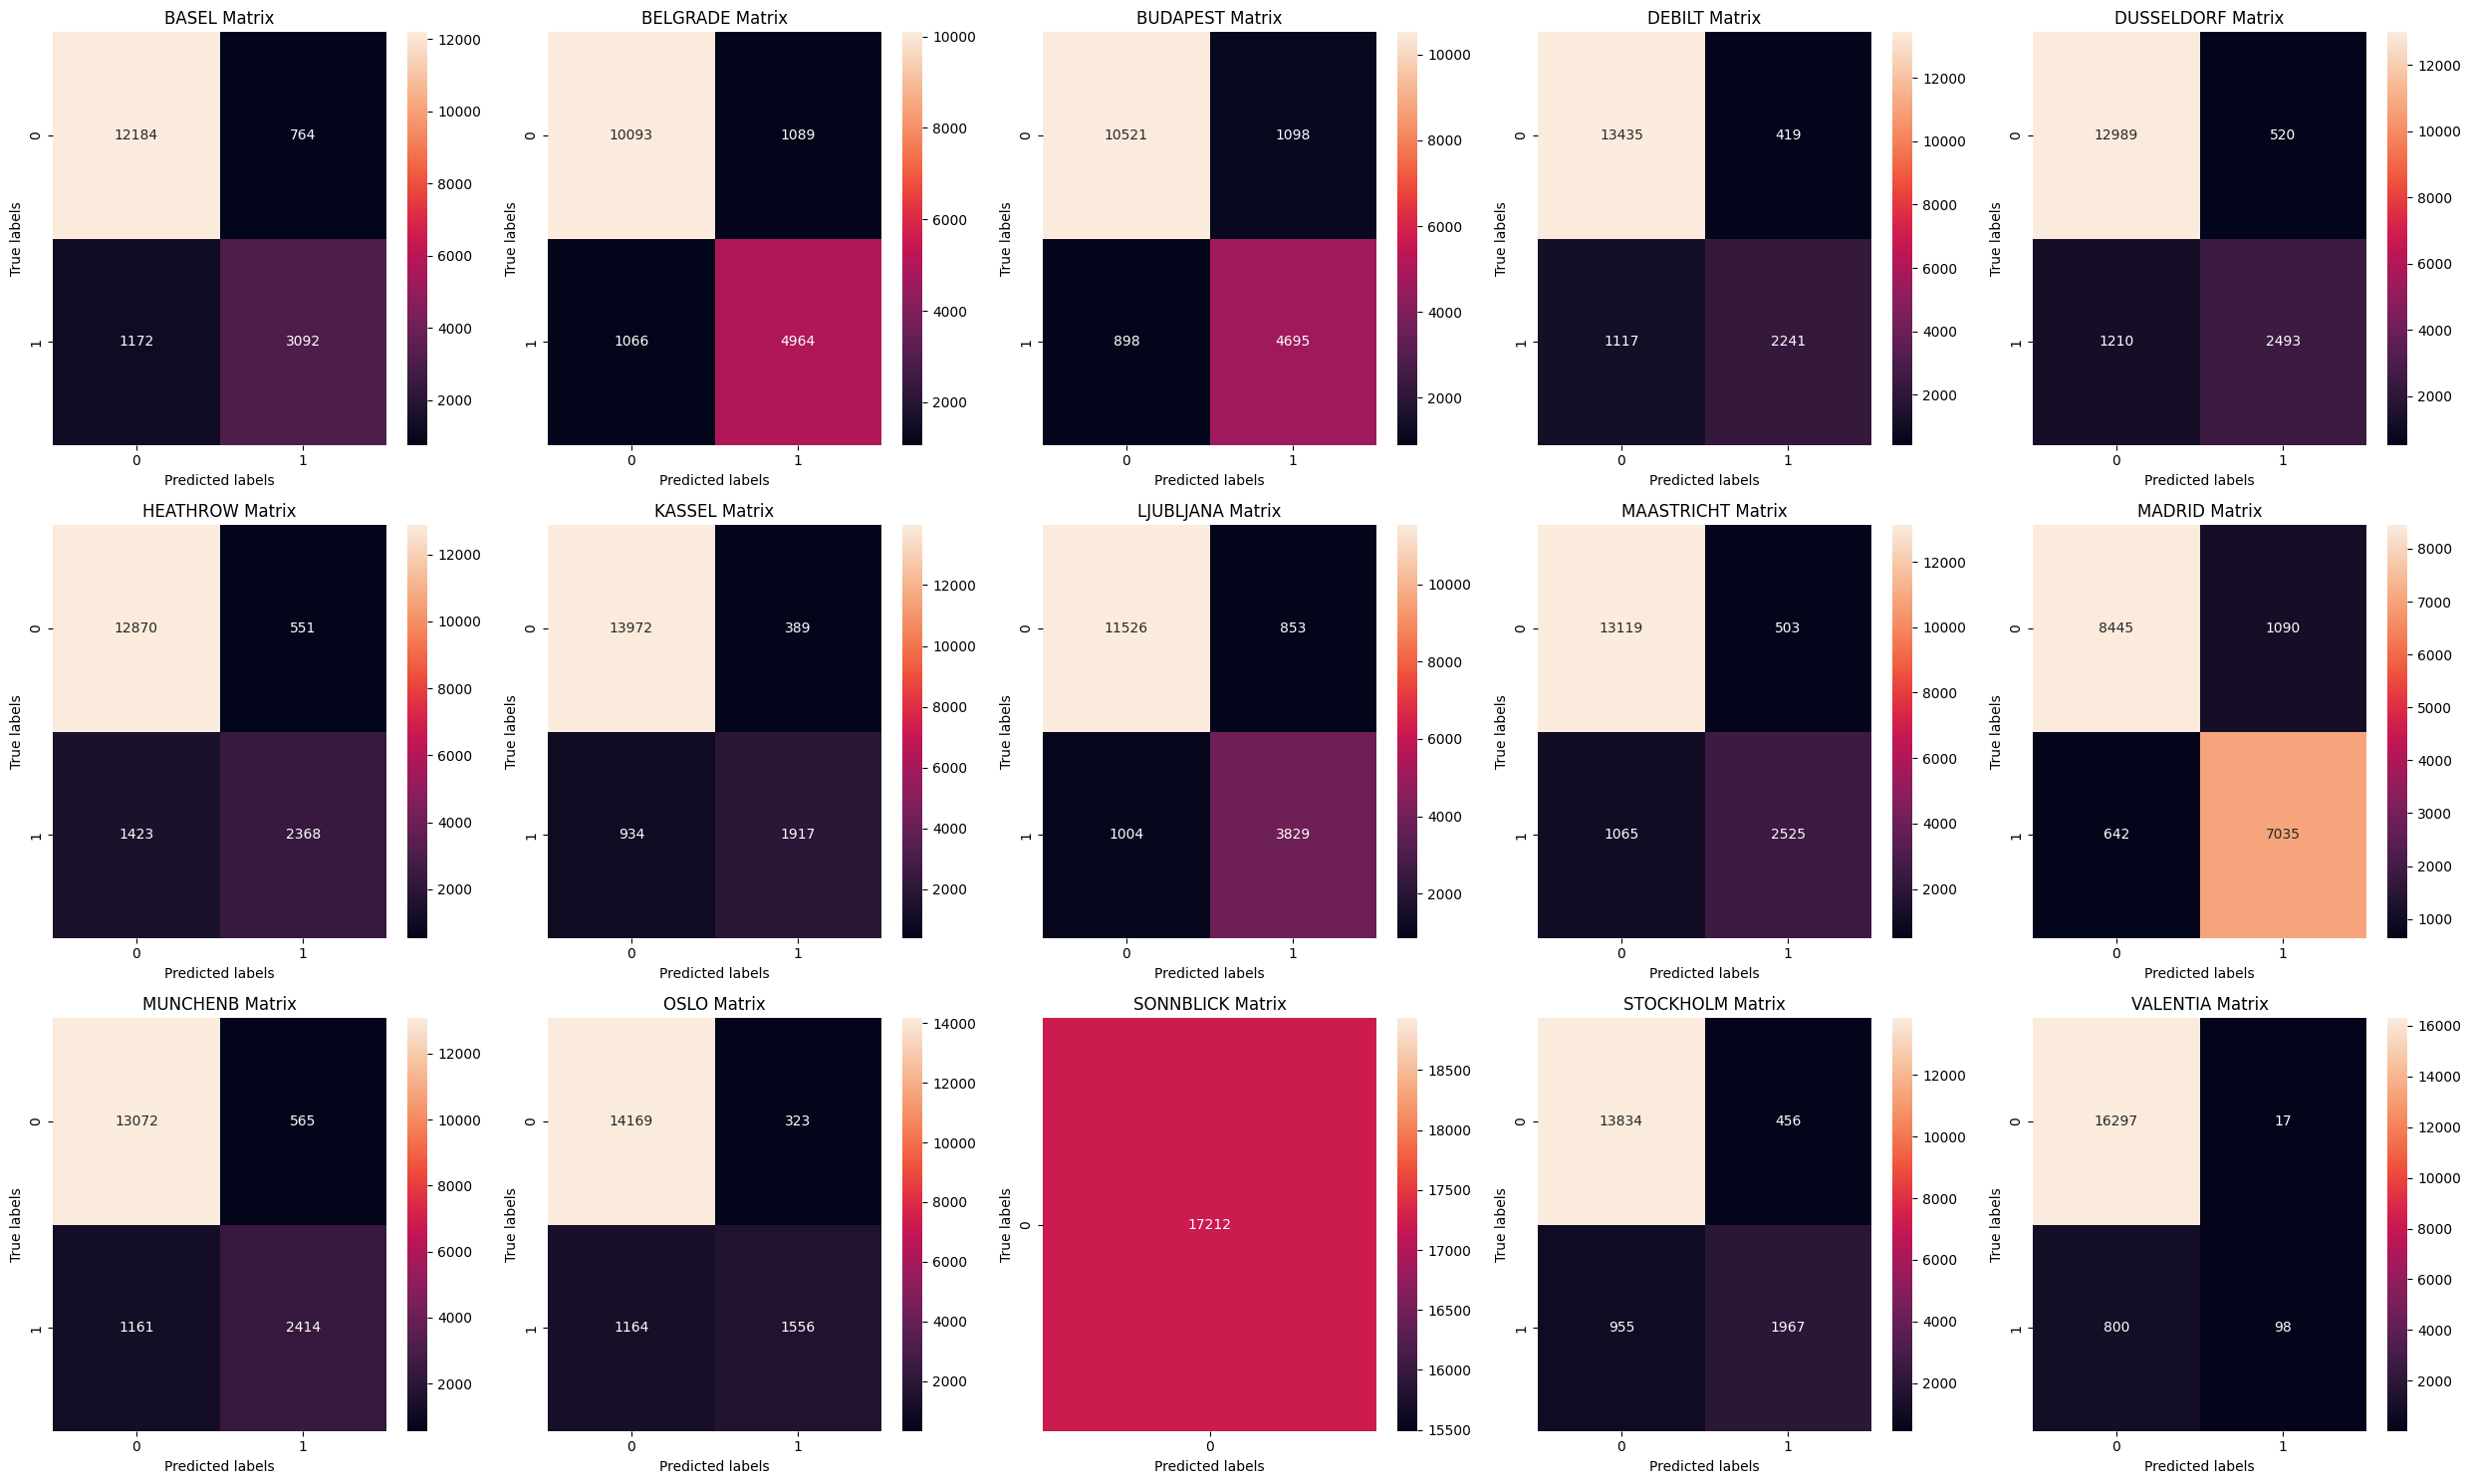

In [40]:
# Confusion matrix based on the last "k" in the sequence (train data)
locations = list({x.split("_")[0] for x in df_reg.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   

figure, ax = plt.subplots(3, 5, figsize=(25,15))

count = 0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train[:, count], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        
        # Labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels') 
        ax[i,j].set_title(name + ' Matrix')
        
        count += 1

plt.tight_layout()
plt.show()